# Wine Quality Prediction

Data Source: https://archive.ics.uci.edu/ml/datasets/Wine+Quality

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import set_config
import os
import warnings

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12.0, 9.0]
plt.rcParams['font.size'] = 12
set_config(display='diagram')                                           # HTML representation of Pipeline (display diagram)
path = os.getcwd()                                                      # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
file_white = os.path.join('datasets', 'winequality-white.csv')          # import white wine dataframe
df_white = pd.read_csv(file_white)

In [4]:
file_red = os.path.join('datasets', 'winequality-red.csv')              # import red wine dataframe
df_red = pd.read_csv(file_red)

# Head and Tail

In [5]:
df_white['color'] = 'white'
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,45.00,45.0,170.0,1001.00000,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,49.00,14.0,132.0,994.00000,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.05,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,58.00,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,58.00,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,39.00,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,47.00,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,41.00,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,22.00,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [6]:
df_red['color'] = 'red'
df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,76.00,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,98.00,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,92.00,15.0,54.0,997.00000,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,75.00,17.0,60.0,998.00000,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,76.00,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.60,0.08,2.0,0.09,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
1595,5.9,0.55,0.10,2.2,62.00,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
1596,6.3,0.51,0.13,2.3,76.00,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
1597,5.9,645.00,0.12,2.0,75.00,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


In [7]:
df_concat = pd.concat([df_white, df_red])                       # stack the two DataFrames
df_concat

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,45.00,45.0,170.0,1001.00000,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,49.00,14.0,132.0,994.00000,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.05,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,58.00,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,58.00,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.60,0.08,2.0,0.09,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
1595,5.9,0.55,0.10,2.2,62.00,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
1596,6.3,0.51,0.13,2.3,76.00,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
1597,5.9,645.00,0.12,2.0,75.00,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


In [8]:
df_concat.shape

(6497, 13)

In [9]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [10]:
df_concat.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,29.488570,0.318633,5.443235,49.680363,30.525319,115.744574,62.186637,3.218501,0.531268,10.491801,5.818378
std,1.296434,134.738314,0.145318,4.757804,37.118821,17.749400,56.521855,238.922805,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.020000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,34.000000,17.000000,77.000000,0.992500,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,3.000000,45.000000,29.000000,118.000000,0.995200,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.420000,0.390000,8.100000,59.000000,41.000000,156.000000,0.997400,3.320000,0.600000,11.300000,6.000000
max,15.900000,1185.000000,1.660000,65.800000,611.000000,289.000000,440.000000,1001.000000,4.010000,2.000000,14.900000,9.000000


# Kernel density estimation

In [11]:
# Kernel density estimation helper function
def plot_kde(df, colname: str):
    return sns.kdeplot(data=df[colname])

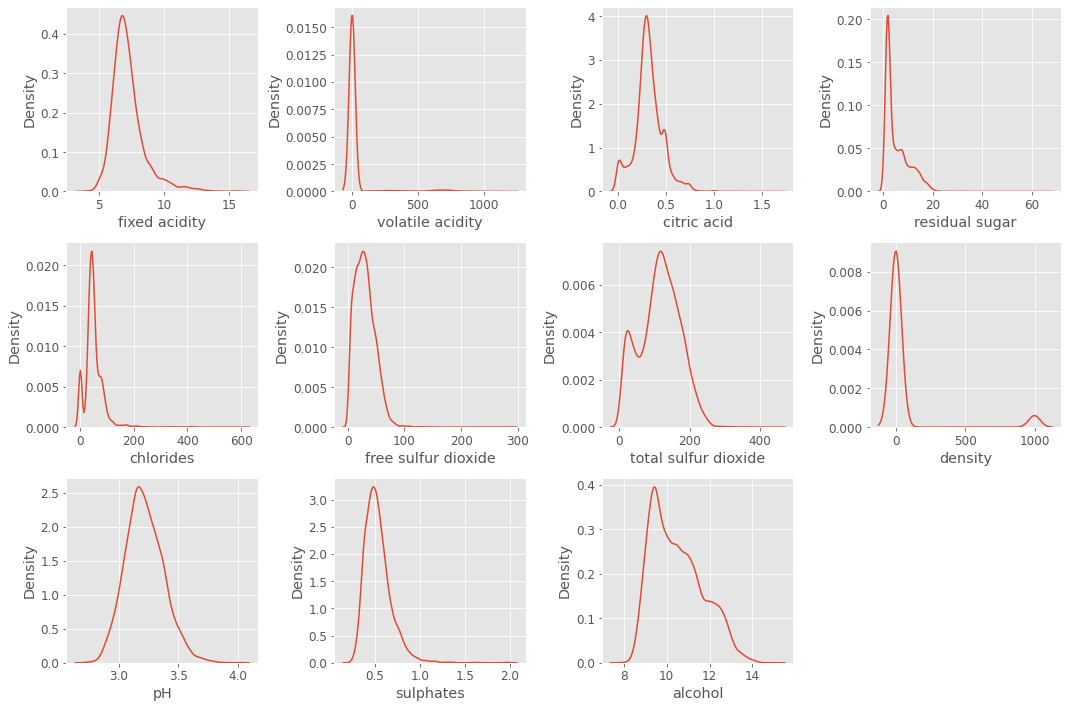

In [12]:
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 
        'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

plt.figure(figsize=(15, 10))
for i in range(11):
    plt.subplot(3, 4, i+1)
    data = df_concat[cols]
    plot_kde(df=df_concat, colname=cols[i])